In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, accuracy_score,r2_score, classification_report
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.tree import DecisionTreeClassifier


In [2]:
df=pd.read_csv("/content/Financial_inclusion_dataset.csv")
df.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


In [4]:
df.isna().sum()

,0
country,0
year,0
uniqueid,0
bank_account,0
location_type,0
cellphone_access,0
household_size,0
age_of_respondent,0
gender_of_respondent,0
relationship_with_head,0


<ipython-input-5-c22bd6e1f01a>:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.drop('uniqueid', axis=1).hist(ax=ax)


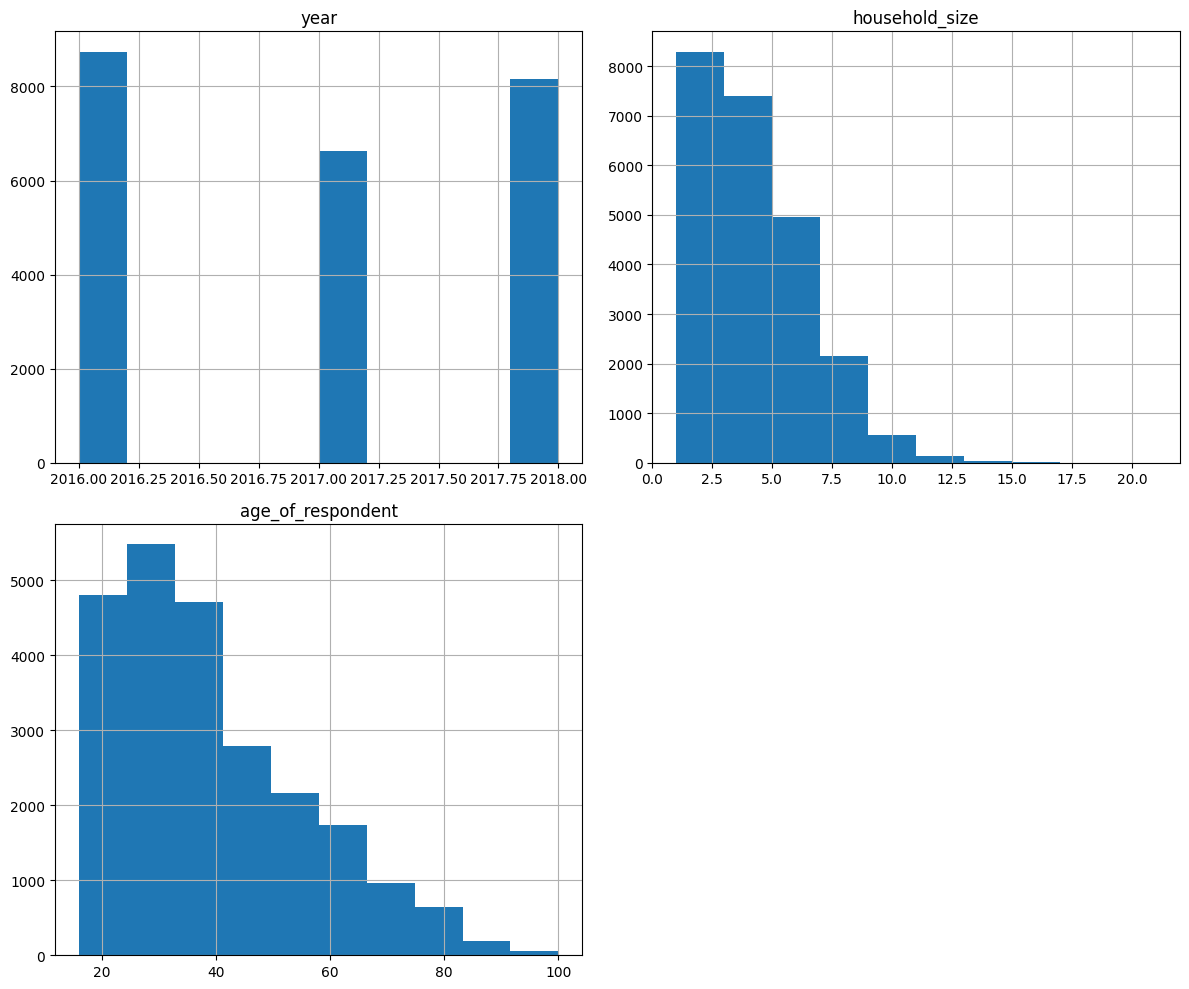

In [5]:
fig, ax = plt.subplots(figsize=(12,10))
df.drop('uniqueid', axis=1).hist(ax=ax)
plt.tight_layout()
plt.show()

In [6]:
for i in df.columns:
  if df[i].dtype == 'O':
    print(df[i].value_counts())
    print('\n')

country
Rwanda      8735
Tanzania    6620
Kenya       6068
Uganda      2101
Name: count, dtype: int64


uniqueid
uniqueid_1       4
uniqueid_1413    4
uniqueid_1411    4
uniqueid_1410    4
uniqueid_1409    4
                ..
uniqueid_7318    1
uniqueid_7317    1
uniqueid_7316    1
uniqueid_7315    1
uniqueid_8759    1
Name: count, Length: 8735, dtype: int64


bank_account
No     20212
Yes     3312
Name: count, dtype: int64


location_type
Rural    14343
Urban     9181
Name: count, dtype: int64


cellphone_access
Yes    17454
No      6070
Name: count, dtype: int64


gender_of_respondent
Female    13877
Male       9647
Name: count, dtype: int64


relationship_with_head
Head of Household      12831
Spouse                  6520
Child                   2229
Parent                  1086
Other relative           668
Other non-relatives      190
Name: count, dtype: int64


marital_status
Married/Living together    10749
Single/Never Married        7983
Widowed                     2708
Divorc

In [7]:
dy =df.copy()

In [8]:
dy.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [9]:
dy.columns

Index(['country', 'year', 'uniqueid', 'bank_account', 'location_type',
       'cellphone_access', 'household_size', 'age_of_respondent',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'education_level', 'job_type'],
      dtype='object')

In [10]:
df.drop(columns='uniqueid',axis=True)

,country,year,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,No,Rural,Yes,4,48,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,No,Rural,Yes,2,27,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,No,Rural,Yes,5,27,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,No,Urban,Yes,7,30,Female,Parent,Divorced/Seperated,Secondary education,Self employed


In [11]:
df.shape

(23524, 13)

In [12]:
le= LabelEncoder()

In [13]:
for i in df.columns:
  if df[i].dtype =='O':
    df[i]= le.fit_transform(df[i])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   country                 23524 non-null  int64
 1   year                    23524 non-null  int64
 2   uniqueid                23524 non-null  int64
 3   bank_account            23524 non-null  int64
 4   location_type           23524 non-null  int64
 5   cellphone_access        23524 non-null  int64
 6   household_size          23524 non-null  int64
 7   age_of_respondent       23524 non-null  int64
 8   gender_of_respondent    23524 non-null  int64
 9   relationship_with_head  23524 non-null  int64
 10  marital_status          23524 non-null  int64
 11  education_level         23524 non-null  int64
 12  job_type                23524 non-null  int64
dtypes: int64(13)
memory usage: 2.3 MB


In [15]:
x =df.drop(columns="bank_account", axis=1).values
y =df.bank_account.values

In [16]:
x

array([[   0, 2018,    0, ...,    2,    3,    9],
       [   0, 2018, 1111, ...,    4,    0,    4],
       [   0, 2018, 2222, ...,    3,    5,    9],
       ...,
       [   3, 2018, 1241, ...,    4,    2,    7],
       [   3, 2018, 1242, ...,    0,    3,    9],
       [   3, 2018, 1243, ...,    3,    3,    6]])

In [17]:
scale =StandardScaler()
x = scale.fit_transform(x)

In [18]:
x

array([[-1.29944427,  1.20854126, -1.5169999 , ..., -0.39296169,
         0.83389097,  1.15462805],
       [-1.29944427,  1.20854126, -1.05242076, ...,  1.60812733,
        -1.65519051, -0.46420749],
       [-1.29944427,  1.20854126, -0.58784162, ...,  0.60758282,
         2.49327861,  1.15462805],
       ...,
       [ 1.94351424,  1.20854126, -0.99805956, ...,  1.60812733,
         0.00419714,  0.50709384],
       [ 1.94351424,  1.20854126, -0.9976414 , ..., -2.39405071,
         0.83389097,  1.15462805],
       [ 1.94351424,  1.20854126, -0.99722324, ...,  0.60758282,
         0.83389097,  0.18332673]])

In [19]:
x_train ,x_test, y_train,y_test = train_test_split(x,y, test_size=0.2, random_state =42)

In [20]:
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [21]:
train_pred = model.predict(x_train)
train_acc = accuracy_score(y_train, train_pred)

In [22]:
train_acc


0.8730538285775015

In [23]:
test_pred =model.predict(x_test)
train_pred =model.predict(x_train)


In [24]:
print (classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      4063
           1       0.67      0.23      0.34       642

    accuracy                           0.88      4705
   macro avg       0.78      0.61      0.64      4705
weighted avg       0.86      0.88      0.85      4705



In [25]:
model =DecisionTreeClassifier(max_depth=3, random_state= 12)
model.fit(x_train,y_train)


DecisionTreeClassifier(max_depth=3, random_state=12)

In [26]:
train2_pred =model.predict(x_train)
train2_acc = accuracy_score(y_train,train2_pred)
train2_acc

0.8784738827780435

In [27]:
Bank_account = 'model.pkl'
pickle.dump(model,open(Bank_account, 'wb'))

In [28]:
new = pickle.load(open('model.pkl','rb'))

In [29]:
x[3]

array([-1.29944427,  1.20854126, -0.12326248, -0.80006449,  0.58972136,
        0.53983446, -0.29086906, -0.83377399, -0.64291609, -0.39296169,
        0.00419714, -0.7879746 ])

In [30]:
new.predict(x[3].reshape(1,-1))

array([0])

In [31]:
features= {}

for i in dy.columns:
  if dy[i].dtype == 'object':
    features[i]=dy[i].unique()

In [32]:
features

{'country': array(['Kenya', 'Rwanda', 'Tanzania', 'Uganda'], dtype=object),
 'uniqueid': array(['uniqueid_1', 'uniqueid_2', 'uniqueid_3', ..., 'uniqueid_8757',
        'uniqueid_8758', 'uniqueid_8759'], dtype=object),
 'bank_account': array(['Yes', 'No'], dtype=object),
 'location_type': array(['Rural', 'Urban'], dtype=object),
 'cellphone_access': array(['Yes', 'No'], dtype=object),
 'gender_of_respondent': array(['Female', 'Male'], dtype=object),
 'relationship_with_head': array(['Spouse', 'Head of Household', 'Other relative', 'Child', 'Parent',
        'Other non-relatives'], dtype=object),
 'marital_status': array(['Married/Living together', 'Widowed', 'Single/Never Married',
        'Divorced/Seperated', 'Dont know'], dtype=object),
 'education_level': array(['Secondary education', 'No formal education',
        'Vocational/Specialised training', 'Primary education',
        'Tertiary education', 'Other/Dont know/RTA'], dtype=object),
 'job_type': array(['Self employed', 'Governm

In [33]:
detail =pickle.dump(features, open('status.pkl','wb'))

In [34]:
check = pickle.load(open('status.pkl', 'rb'))

In [35]:
check

{'country': array(['Kenya', 'Rwanda', 'Tanzania', 'Uganda'], dtype=object),
 'uniqueid': array(['uniqueid_1', 'uniqueid_2', 'uniqueid_3', ..., 'uniqueid_8757',
        'uniqueid_8758', 'uniqueid_8759'], dtype=object),
 'bank_account': array(['Yes', 'No'], dtype=object),
 'location_type': array(['Rural', 'Urban'], dtype=object),
 'cellphone_access': array(['Yes', 'No'], dtype=object),
 'gender_of_respondent': array(['Female', 'Male'], dtype=object),
 'relationship_with_head': array(['Spouse', 'Head of Household', 'Other relative', 'Child', 'Parent',
        'Other non-relatives'], dtype=object),
 'marital_status': array(['Married/Living together', 'Widowed', 'Single/Never Married',
        'Divorced/Seperated', 'Dont know'], dtype=object),
 'education_level': array(['Secondary education', 'No formal education',
        'Vocational/Specialised training', 'Primary education',
        'Tertiary education', 'Other/Dont know/RTA'], dtype=object),
 'job_type': array(['Self employed', 'Governm

In [36]:
df

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,0,2018,0,1,0,1,3,24,0,5,2,3,9
1,0,2018,1111,0,0,0,5,70,0,1,4,0,4
2,0,2018,2222,1,1,1,5,26,1,3,3,5,9
3,0,2018,3333,0,0,1,5,34,0,1,2,2,3
4,0,2018,4444,0,1,0,8,26,1,0,3,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,3,2018,1239,0,0,1,4,48,0,1,0,0,7
23520,3,2018,1240,0,0,1,2,27,0,1,3,3,7
23521,3,2018,1241,0,0,1,5,27,0,4,4,2,7
23522,3,2018,1242,0,1,1,7,30,0,4,0,3,9


In [37]:
list(dy.iloc[2])

['Kenya',
 2018,
 'uniqueid_3',
 'Yes',
 'Urban',
 'Yes',
 5,
 26,
 'Male',
 'Other relative',
 'Single/Never Married',
 'Vocational/Specialised training',
 'Self employed']

In [46]:
x[2]

array([-1.29944427,  1.20854126, -0.58784162,  1.24989924,  0.58972136,
        0.53983446, -0.77512418,  1.19936578,  0.41341065,  0.60758282,
        2.49327861,  1.15462805])

In [45]:
new.predict(x[2].reshape(1,-1))

array([1])